<a href="https://colab.research.google.com/github/gusrud1103/FallDownDetection_tobigs/blob/master/ADP%EC%8B%A4%EC%8A%B5_1%EC%A3%BC%EC%B0%A8_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://jae-eun-ai.tistory.com/48

1. T - 검정

    1-1 일표본 t-검정 (one sample t-test)

    단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교하고자할 때, 일표본t검정에서는 모집단의 구성요소들이 정규분포를 이룬다는 가정하에 검정통계량 값을 계산/ 종속변수는 연속형 변수여야 하며 검증하고자 하는 기준값이 있어야 한다.

    단일 모집단에서 알고자하는 값이 종속변수가 되며, 설정한 기준값과 종속변수의 평균값 사이의 차이가 통계적으로 유의하다면 두 값이 다르다고 결론을 내릴 수 있음

    A과수원에서 생산된 사과의 평균무게는 200g으로 알려져있다. 실제로도 그러한지 알아보기 위해 과수원에서 생산되는 사과15개를 임의로 뽑아서 무게를 측정. 
    
    해당 데이터를 가지고 A과수원에서 생산되는 전체사과 무게의 평균이 200g과 같다고 할 수 있는지 검정해보자

    귀무가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이다.
    대립가설 : A과수원에서 생산되는 사과무게의 평균값은 200g이 아니다.

In [2]:
#알려진 평균
mu = 200
#수집된 표본
data = [200,210,180,190,185,170,180,
       180,210,180,183,191,204,201,186]

#데이터가 적어도 30개 이상이면 중심극한 정리를 적용할 수 있지만
#여기서는 데이터 수가 15개 이기 때문에 별도의 정규성 검정이 필요
### 정규성 검정
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.9217347502708435, pvalue=0.20472237467765808)

첫번째 결과는 검정통계치이고 두번째 값은 p-value이다. 정규성 검정에서는 p-value가 유의수준 0.05보다 클 경우 표본이 정규분포를 따른다고 판단 할 수 있다.

Text(0.5, 1.0, 'box plot')

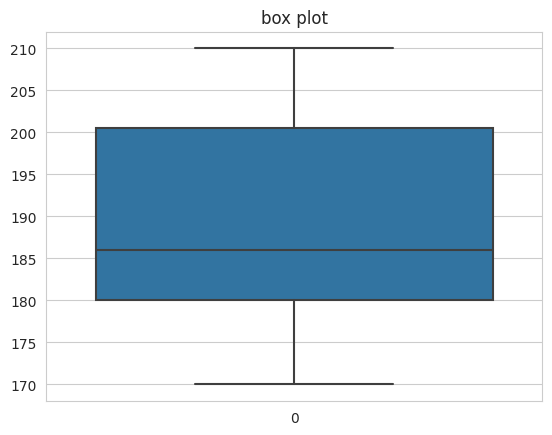

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

sns.boxplot(data=data)
plt.title('box plot')

In [4]:
# 일표본 t-검정
from scipy.stats import ttest_1samp

ttest_1samp(data, mu)

TtestResult(statistic=-3.1562714293709564, pvalue=0.007003780898109026, df=14)

검정통계량(t값)은 -3.156, 유의확률은 0.007004이다. p-value가 유의수준0.05보다 작기때문에 귀무가설을 기각하고, A과수원에서 생산되는 사과의 평균무게는 200g이 아니다라고 결론내릴 수 있다.
파이썬에서는 df, confidence interval, mean 정보가 없어서인지 조금 썰렁..

In [5]:
#자유도 계산
df = len(data) - 1
print(df)

#평균과 신뢰구간
from numpy import array,mean
from scipy.stats import sem,t
def mean_confidence_interval(data, confidence=.95):
    a = 1.0 * array(data)
    n = len(a)
    m,se = mean(a),sem(a)
    h = se*t._ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(data)

14


(190.0, 183.20468237313676, 196.79531762686324)

  1. T - 검정

    1-2.  대응표본 t-검정 (paired sample t-test)

    단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 다른 평균의 차이를 비교하고자 할때 사용하는 검정

    하나의 모집단에서 크기가 n개인 하나의 표본을 추출한 후, 표본 내의 개채들에 대해서 두번의 측정을 실시한다.

    모집단과 표본은 하나씩이지만, 각 개체들에 대해 두 개씩의 관측값이 존재하므로 모수는 두개이다.

    모집단의 관측값이 정규성을 만족해야한다. 일반적으로 표본의 크기가 충분히 클 때 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다. / 종속변수는 연속형 변수여야함

    부부 30쌍을 대상으로 남편과 아내의 결혼 만족도에 차이, 쌍둥이 연구, before-after 연구 모두 paired t-test를 사용



```
10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단하고자 함. 표본이 정규성을 만족한다는 가정하에 단측검정 수행
귀무가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간에는 차이가 없다.(D=0)
대립가설 : 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 0보다 작다.(D<0)

```



In [7]:
import pandas as pd
before = [7,3,4,5,2,1,6,6,5,4]
after = [8,4,5,6,2,3,6,8,6,5]
when = ['before', 'after']
when = [when[j] for j in range(2) for i in range(10)]
data = pd.DataFrame({'when':when, 'score':before+after})
data.head(3)

,when,score
0,before,7
1,before,3
2,before,4


<Axes: xlabel='when', ylabel='score'>

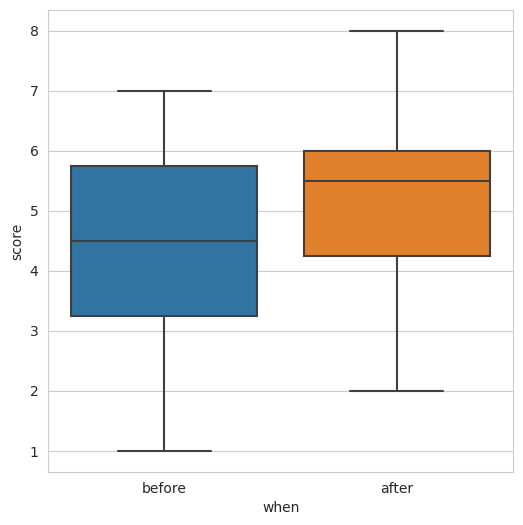

In [8]:
plt.figure(figsize=(6,6))
sns.boxplot(x='when', y='score', data=data)

In [9]:
#정규성 검정
from scipy.stats import shapiro

normal1 = shapiro(before)
normal2 = shapiro(after)
print(normal1, normal2)

#p-value모두 0.05보다 크기 때문에 정규성에 문제가 없음.

ShapiroResult(statistic=0.9644591808319092, pvalue=0.835266649723053) ShapiroResult(statistic=0.945683479309082, pvalue=0.6177965998649597)


In [10]:
# 등분산성 고려
from scipy.stats import levene
print(levene(before, after))

from scipy.stats import bartlett
print(bartlett(before, after))  

#p-value가 0.05보다 커서 등분산성이 있다고 할 수 있다.

LeveneResult(statistic=0.0, pvalue=1.0)
BartlettResult(statistic=0.007785808167159078, pvalue=0.9296881301038368)


In [11]:
import scipy.stats

# 대응표본 t검정 수행
scipy.stats.ttest_rel(before,after)

TtestResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528, df=9)

대응표본 t검정 수행결과, 검정통계량t값은 -4.7434, 유의확률은 0.001로 유의수준 0.05보다 작기때문에 귀무가설을 기각하고 수면영양제를 복용하기 전과 후의 평균 수면시간 차이는 통계적으로 유의하며, 영양제를 복용한 후 수면시간이 줄었다라는 결론을 내릴 수 있음

T - 검정

  1.3 독립표본 t-검정 (paired sample t-test)

  두개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정

  두 개의 모집단에서 크기가 n개인 표본을 각각 추출한 후 표본의 관측값들을 이용해 검정을 실시. 따라서 독립표본 t검정에서는 모집단, 모수, 표본이 모두 두개씩 존재.

  두 모집단은 정규성을 만족해야한다. 표본의 크기가 충분히 크다면 중심극한정리에 따라 정규성을 만족한다고 볼 수 있다. / 두개의 모집단은 서로 독립적이어야 한다. / 두 모집단의 분산이 서로 같음을 의미하는 등분산성 가정을 만족해야한다 (등분산성 가정은 두 독립집단의 모분산이 동일해야함을 의미)/ 독립변수는 범주형, 종속변수는 연속형이어야 한다.

  부부100쌍을 뽑아 남편 100명과 아내 100명으로 집단 비교하는 경우는 대응표본/ 무작위로 남자 100명 여자 100명을 뽑아 두 집단을 비교하는 경우는 독립표본

    a,b두 지역의 겨울 낮 최고기온에 차이가 있는지를 알아보기 위해 10일동안 두 지역의 낮 최고기온을 측정한 데이터로 독립표본 t검정을 수행해보자. (표본이 정규성을 만족한다는 가정 하에 양측검정 수행)

    귀무가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 없다.
    대립가설 : a,b 두 지역에 따른 겨울 낮 최고기온은 차이가 있다.

In [12]:
a = [-1,0,3,4,1,3,3,1,1,3]
b = [6,6,8,8,11,11,10,8,8,9]
group = ['a']*10 + ['b']*10
data = pd.DataFrame({'group':group, 'temp':a+b})
data.head(3)

,group,temp
0,a,-1
1,a,0
2,a,3


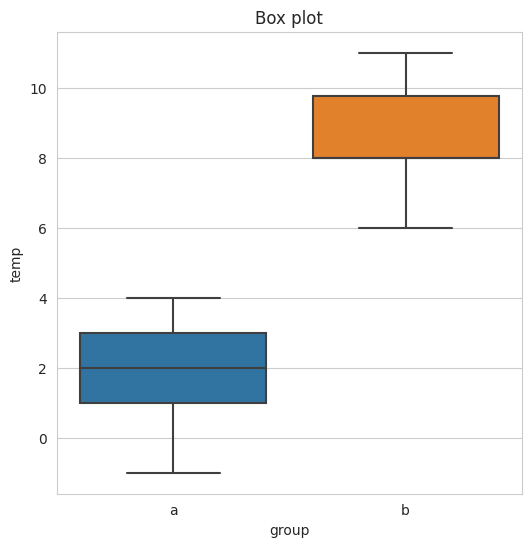

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='group', y='temp', data=data)
plt.title('Box plot')
plt.show()

In [15]:
# 데이터가 10개뿐이므로 shapiro-wilks의 정규성을 검정해보자
normal1 = shapiro(a)
normal2 = shapiro(b)
print(normal1, normal2)

#결과는 모두 p-value가 0.05보다 커서 정규성을 만족한다.

ShapiroResult(statistic=0.9004895687103271, pvalue=0.22182336449623108) ShapiroResult(statistic=0.9001172184944153, pvalue=0.21974670886993408)


In [16]:
#levene test로 등분산성을 검정
from scipy.stats import levene, ttest_ind
print(levene(a,b))

#등분산성을 bartlett test로 할 수도 있음 바틀렛
from scipy.stats import bartlett
print(bartlett(a,b))

#p-value가 유의수준 0.05보다 크기 때문에 귀무가설을 기각하지 않는다
#따라서 a,b두 집단의 데이터는 등분산성을 만족한다고 볼 수 있음. 

LeveneResult(statistic=0.04864864864864852, pvalue=0.8279140454175956)
BartlettResult(statistic=0.07575407415781324, pvalue=0.7831360213267907)


In [17]:
ttest_ind(a,b)

#검정 통계량은 -8.806, p-value는 6.085e-08이다. p-value가 0에 가까운 매우 작은 숫자로 
#유의수준보다 작기 때문에 귀무가설을 기각한다. 
#따라서 a,b두 지역의 겨울 낮 최고기온에는 통계적으로 유의한 차이가 존재한다는 결론을 내릴 수 있음

Ttest_indResult(statistic=-8.805969882200301, pvalue=6.085029390352169e-08)

In [18]:
#등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가합니다.

ttest_ind(a,b, equal_var=False)

Ttest_indResult(statistic=-8.805969882200301, pvalue=6.535174335638131e-08)